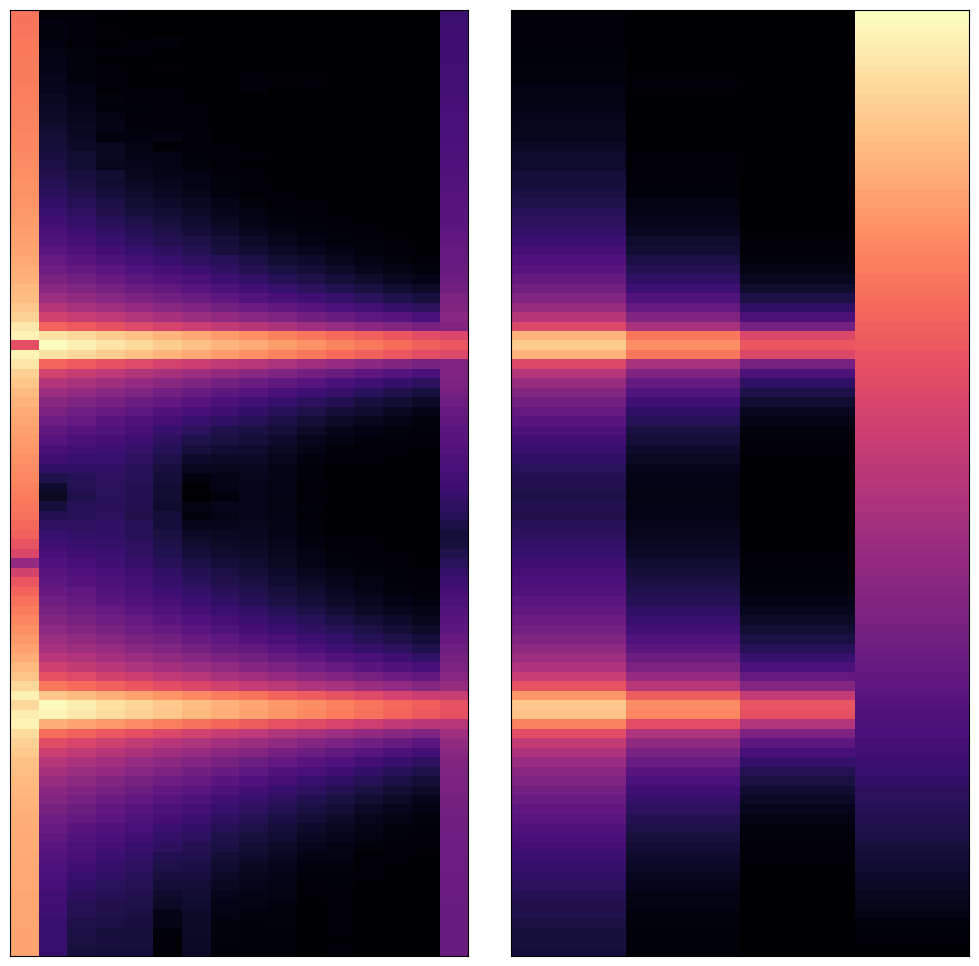

In [1]:
import sys
sys.path.append('../')
import torch
import torchaudio
from src.ddsp.mss_loss import MSSLoss, spec2point
import numpy as np

sample_rate = 16000
frame_num = 4000
spec = torchaudio.transforms.Spectrogram(n_fft=512).cuda()
eps = 1e-7

gt_freq = torch.tensor([800, 2000]).cuda().float().unsqueeze(-1)
t = torch.arange(frame_num).cuda()/sample_rate
y_gt = torch.sin(2 * np.pi * gt_freq * t).sum(0).unsqueeze(0) * torch.exp(-t * 20)
spec_gt = spec(y_gt)
# spec_gt[:, :] = spec_gt.mean(-1).unsqueeze(-1)
spec_gt = (spec_gt + eps).log2() - np.log2(eps)
spec_gt = spec_gt[:, :100, :] / 40

point = spec2point(spec_gt)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(spec_gt[0].cpu().numpy(), origin="lower", aspect="auto", cmap='magma')
fig.tight_layout()
# remove ticks
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(point[0].cpu().numpy(), origin="lower", aspect="auto", cmap='magma')
fig.tight_layout()
# remove ticks
plt.xticks([])
plt.yticks([])
plt.savefig('spec2point.png')
